In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from networkx.utils import open_file, make_str
import networkx as nx
import math
from networkx import path_graph, random_layout

from pylab import rcParams
rcParams['figure.figsize'] = 10,10

In [ ]:
features = pd.read_csv("elliptic_txs_features.csv")
edges = pd.read_csv("elliptic_txs_edgelist.csv")
classes =  pd.read_csv("elliptic_txs_classes.csv")

In [ ]:
edges = pd.read_csv('/content/drive/My Drive/Colab Notebooks/elliptic_txs_edgelist.csv')
classes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/elliptic_txs_classes.csv')
features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/elliptic_txs_features.csv')

In [ ]:
features["label"]=classes[["class"]]

In [ ]:
features.replace('unknown',"3")
features["label"].unique()
labelled=features.loc[features['label'].isin(["1","2"])]

In [ ]:
features = labelled

In [ ]:
features.shape

(46564, 168)

In [ ]:
classes = classes.replace("unknown","3")
classes["Time step"]=features[["1"]]
classes=classes.loc[classes['class'].isin(["1","2"])]
classes["class"].replace({"1": 1, "2": 2}, inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
def RFclassifier(X_train, Y_train, X_test, Y_test):
  clf = RandomForestClassifier(max_depth=1000, random_state=0).fit(X_train, Y_train)
  y_pred = clf.predict(X_test)
  f1 = f1_score(Y_test, y_pred, average = None)
  # print(f1)
  score = clf.score(X_test,Y_test)
  return f1, score

In [ ]:
total_timesteps = features["1"].max()

In [ ]:
features.shape

(46564, 168)

In [ ]:
labels = features[['1','label']]

In [ ]:
labels.shape

(46564, 2)

In [ ]:
features = features.drop("label",axis=1)

In [ ]:
time_data = features.loc[(features['1'] == 1)]
label = labels.loc[(labels['1'] == 1)]
f1scores = []
accuracies = []

In [ ]:
#Iterating over each timestep and adding it to the training set while testing the model on the next timestep data
for i in range (2,total_timesteps+1,1):
  curr_train = features.loc[(features['1'] == i)]
  curr_label = labels.loc[(labels['1'] == i)] 
  curr_f1, curr_accuracy = RFclassifier(time_data,label["label"],curr_train,curr_label["label"])
  f1scores.append(curr_f1)
  accuracies.append(curr_accuracy)
  frames_1 = [time_data, curr_train]
  frames_2 = [label, curr_label]
  time_data = pd.concat(frames_1)
  label = pd.concat(frames_2)


In [ ]:
temp = []
x_axis = []
for i in range (0,len(f1scores)):
  temp.append(f1scores[i][0])
  x_axis.append(i)

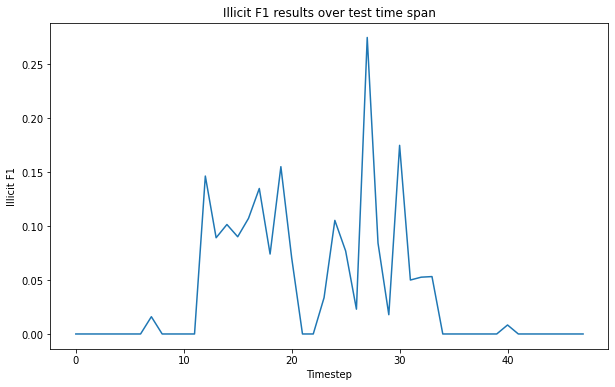

In [ ]:
# Plotting F1 score obatined after adding timesteps to data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot( x_axis,temp)
ax.set(title = "Illicit F1 results over test time span",
       xlabel = "Timestep",
       ylabel = "Illicit F1")

plt.show()